# ***Problem statement***


1.   you are provided with a .csv file which contains experience of the employee (in months) and the salary of the employee (in thousand).
2.   Your task is to help the employer in predicting the salary he has to give to a employee based on his past experience
3. For this you need to understand the basic principle and functionining of linear regression and complete the functions below.



# **Packages**

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import copy


 **import data file**

 **clean the data upto 2 decimal places for both experience and salary columns**

**test size = 20%**

**reshape the values by using concept of feature matrix**

In [10]:
data = pd.read_csv('Experience-Salary.csv')
#  code starts here

# 1 ( Taking SERIES & round off to 2 decimal places)
X=data['exp(in months)'].round(2)
y=data['salary(in thousands)'].round(2)

# 2 (split data in train and test cases in ratio of 20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40)

# 3 (supplying arguments as array)
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

# code ends here



In [11]:
# Run this code without making any changes


# !!!!       IMP   !!!!!!!
# X_train refers to the training data ( experience) for the model
# y_train refers to the training data (salary )   for the model





print("Type of x_train:",type(X_train))
print("First five elements of x_train are:\n", X_train[:5])
print("Type of y_train:",type(y_train))
print("First five elements of y_train are:\n", y_train[:5])
print ('The shape of x_train is:', X_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(X_train))

Type of x_train: <class 'numpy.ndarray'>
First five elements of x_train are:
 [34.52  3.57 28.65 18.85 30.19]
Type of y_train: <class 'numpy.ndarray'>
First five elements of y_train are:
 [33.86 17.6  25.74 25.6  31.18]
The shape of x_train is: (800,)
The shape of y_train is:  (800,)
Number of training examples (m): 800


 Plot the data using scatter plot



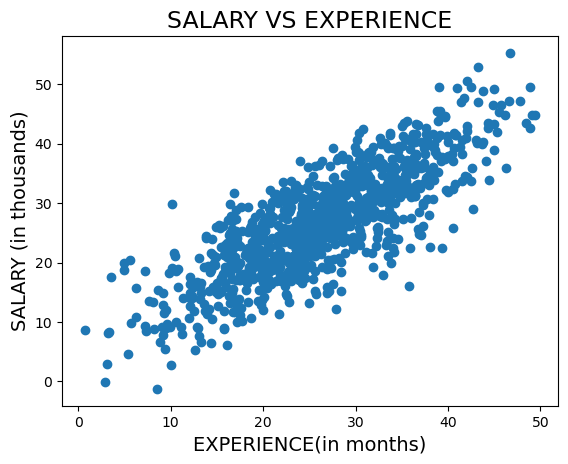

In [50]:
#plot data for visualisation

###code starts here
%matplotlib inline

plt.title('SALARY VS EXPERIENCE',fontsize=17)
plt.xlabel('EXPERIENCE(in months)',fontsize=14)
plt.ylabel('SALARY (in thousands)',fontsize=14)

plt.scatter(X,y)
plt.show()


###code ends here

**Implementation 1**

**complete the compute_cost() function below to compute the cost  𝐽(𝑤,𝑏)
 .**

In [16]:



def compute_cost(x, y, w, b):
    """
    Computes the cost function for linear regression.

    Args:
        x (ndarray): Shape (m,) Input to the model (experience in months)
        y (ndarray): Shape (m,) Label (Actual salaries)
        w, b (scalar): Parameters of the model

    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0]

    # You need to return this variable correctly
    total_cost = 0

    ### START CODE HERE ###
    
    
    predicted_val= w*x +b          #predicted value for x
    
    squared_sum= np.sum((y-predicted_val)**2)   #RESIDUAL/ differnce
    
    total_cost= (squared_sum)/(2*m)    #cost function/ mean_squared_sum



    ### END CODE HERE ###

    return total_cost

In [17]:
# Compute cost with some initial values for paramaters w, b
# Do not change the values in this code , simply run this block
initial_w = 0.9998
initial_b = 1

cost = compute_cost(X_train, y_train, initial_w, initial_b)
print(type(cost))
print(cost)


#output for cost should be around 14.406

<class 'numpy.float64'>
14.290505324602705


**Imlementation 2**


**implement a function called compute_gradient which calculates  ∂𝐽(𝑤)∂𝑤
 ,  ∂𝐽(𝑤)∂𝑏**

In [33]:
def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression
    Args:
      x (ndarray): Shape (m,) Input to the model (Population of cities)
      y (ndarray): Shape (m,) Label (Actual profits for the cities)
      w, b (scalar): Parameters of the model
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b
     """

    # Number of training examples
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    ### START CODE HERE ###

    predict_val= w*x +b          
    
    w_sum= np.sum((predict_val-y)*x)   
    b_sum= np.sum(predict_val-y)   
    
    dj_dw = (w_sum)/m       #slope/gradient wrt w
    dj_db = (b_sum)/m       #slope/gradient wrt b
   
    ### END CODE HERE ###

    return dj_dw, dj_db

In [34]:
initial_w = 0.998
initial_b = 1

tmp_dj_dw, tmp_dj_db = compute_gradient(X_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

# output should be
#Gradient at initial w, b (zeros): [22.08482317] [0.36802405]

Gradient at initial w, b (zeros): 24.0955093545 0.46576320000000004


In [35]:
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(X_train, y_train, test_w, test_b)

print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

#output should be
#Gradient at test w, b: [-600.2060557] [-21.2052925]

Gradient at test w, b: -606.043616075 -21.266495


**!! do not change the below function just run it**

In [38]:

def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    m = len(x)
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b )
        w = w - alpha * dj_dw #convergence formula
        b = b - alpha * dj_db #convergence formula
        if i<100000:
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
    return w, b, J_history, w_history

 **Now let's run the gradient descent algorithm above to learn the parameters for our dataset.**

In [39]:
# you can alter the values of iterations, alpha to get the minimum cost and minimum values for w and b


# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 2500
alpha = 0.0001

w,b,J_,W_ = gradient_descent(X_train ,y_train, initial_w, initial_b,
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost   340.36   
Iteration  250: Cost    14.26   
Iteration  500: Cost    14.25   
Iteration  750: Cost    14.25   
Iteration 1000: Cost    14.24   
Iteration 1250: Cost    14.24   
Iteration 1500: Cost    14.23   
Iteration 1750: Cost    14.23   
Iteration 2000: Cost    14.22   
Iteration 2250: Cost    14.22   
w,b found by gradient descent: 0.9957595030415974 0.14719275786835498


**Train the model**

In [44]:
# execute the code to predict the output values on the given imput of numpy arrays
# do not alter the code just execute it
m = X_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * X_train[i] + b

**plot the predicted values to see the linear fit.**

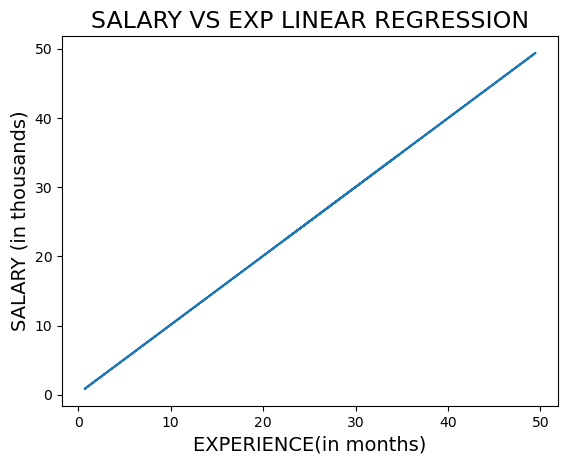

In [51]:
# Plot the linear fit

###code starts here
%matplotlib inline

plt.title('SALARY VS EXP LINEAR REGRESSION',fontsize=17)
plt.xlabel('EXPERIENCE(in months)',fontsize=14)
plt.ylabel('SALARY (in thousands)',fontsize=14)



predicted=w * X_train + b
plt.plot(X_train,predicted)
plt.show()











###code ends here


**output on input values**

**Predict output on input values(in months) [17.0,50.0]**

In [ ]:
###code starts here

m = X_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * X_train[i] + b

###code ends here